In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all columns

1. Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” – malicious). Описание данных доступно на сайте https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [76]:
df = pd.read_csv('data_breast.csv')
print(df.shape)

(569, 33)


In [77]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [78]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [79]:
#Выкинем какой-то совсем непоннятный признак


df.drop('Unnamed: 32', axis=1, inplace=True)
#Выкинем id -он нам врядли что-то объяснить

df.drop('id', axis=1, inplace=True)
#Выкинем id -он нам врядли что-то объяснить

#Предстваим целевую переменную в каком-то числовом варианте
df['diagnosis']=df['diagnosis'].apply(lambda x: 0 if x=='B' else 1  )

2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [80]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.72

In [81]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

3. Выбрать стратегию для работы с пропущенными значениями.

In [82]:
for x in df.columns:
    print('Для {0} пустых строк {1}'.format( x,len(df[pd.isnull( df[x])])))

Для diagnosis пустых строк 0
Для radius_mean пустых строк 0
Для texture_mean пустых строк 0
Для perimeter_mean пустых строк 0
Для area_mean пустых строк 0
Для smoothness_mean пустых строк 0
Для compactness_mean пустых строк 0
Для concavity_mean пустых строк 0
Для concave points_mean пустых строк 0
Для symmetry_mean пустых строк 0
Для fractal_dimension_mean пустых строк 0
Для radius_se пустых строк 0
Для texture_se пустых строк 0
Для perimeter_se пустых строк 0
Для area_se пустых строк 0
Для smoothness_se пустых строк 0
Для compactness_se пустых строк 0
Для concavity_se пустых строк 0
Для concave points_se пустых строк 0
Для symmetry_se пустых строк 0
Для fractal_dimension_se пустых строк 0
Для radius_worst пустых строк 0
Для texture_worst пустых строк 0
Для perimeter_worst пустых строк 0
Для area_worst пустых строк 0
Для smoothness_worst пустых строк 0
Для compactness_worst пустых строк 0
Для concavity_worst пустых строк 0
Для concave points_worst пустых строк 0
Для symmetry_worst пуст

Пропущенных значений у нас нет

4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [83]:
y = df.diagnosis  
#data.drop('diagnosis', axis=1, inplace=True)
x = df.copy()
x.drop('diagnosis', axis=1, inplace=True)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.07871     1.0950      0.9053         8.589   153.40   
1                 0.05667     0.5435      0.7339         3.398    74.08   
2                 0.05999     0.7456      0.7869         4.585    94.03   
3                 0.09744     0.4956      1.1560         3.445    27.23   
4                 0.05883     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [84]:
corr = df.corr()
corr

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

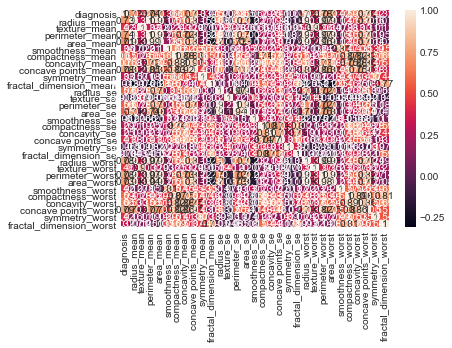

In [85]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

5. Визуализировать взаимосвязи между переменными.

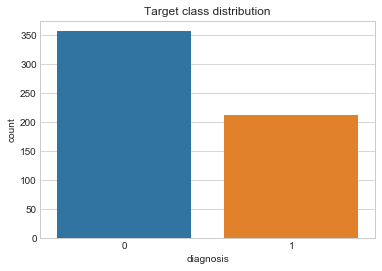

In [86]:
ax = plt.axes()
sns.countplot(x='diagnosis', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

In [87]:
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.07871     1.0950      0.9053         8.589   153.40   
1                 0.05667     0.5435      0.7339         3.398    74.08   
2                 0.05999     0.7456      0.7869         4.585    94.03   
3                 0.09744     0.4956      1.1560         3.445    27.23   
4                 0.05883     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

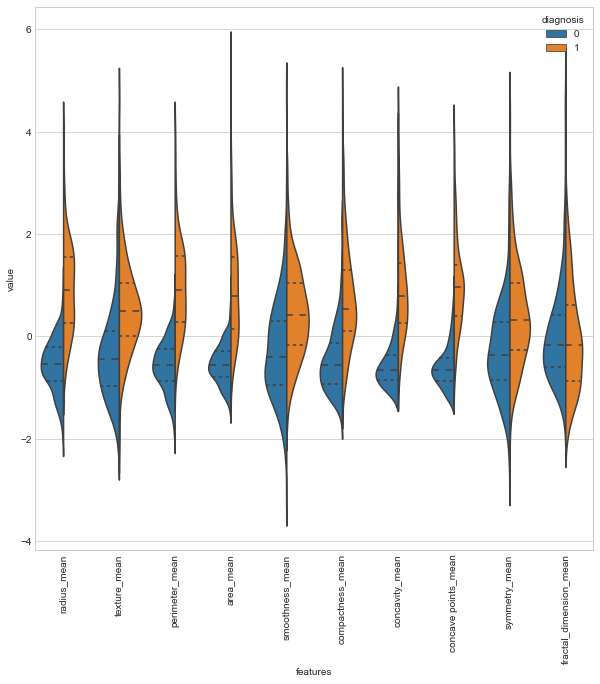

In [88]:
# Нарисуем распредление целевого событий   для средних
#Уже видно, что например, symmetry_mean	fractal_dimension_mean нам
#      врядли что-то помогут объяснить, у ни распреление для обоих исхордов одиноковое
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

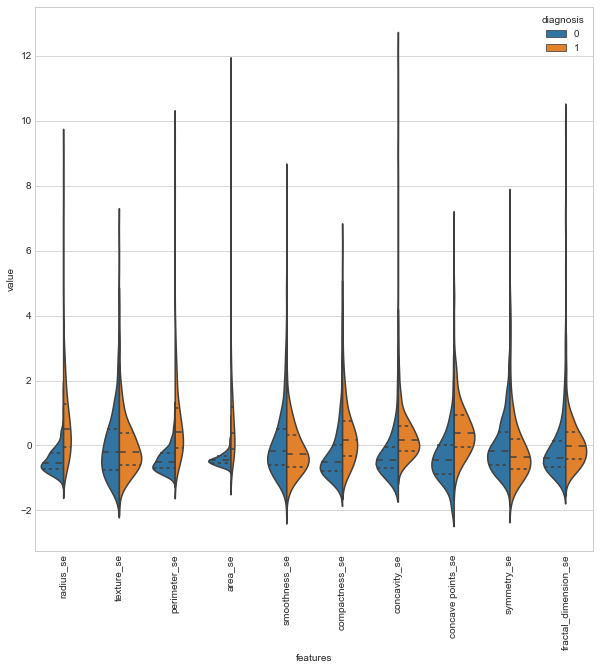

In [89]:
# Для стандартной ошибки
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

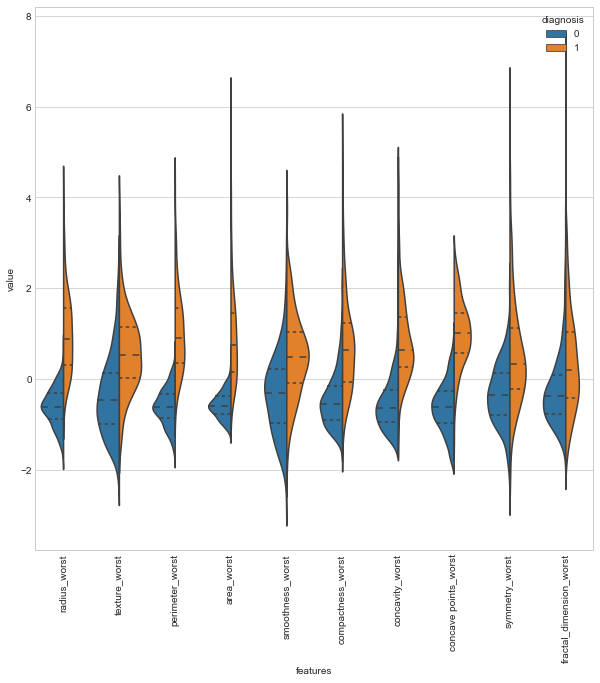

In [90]:
#Для худших
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

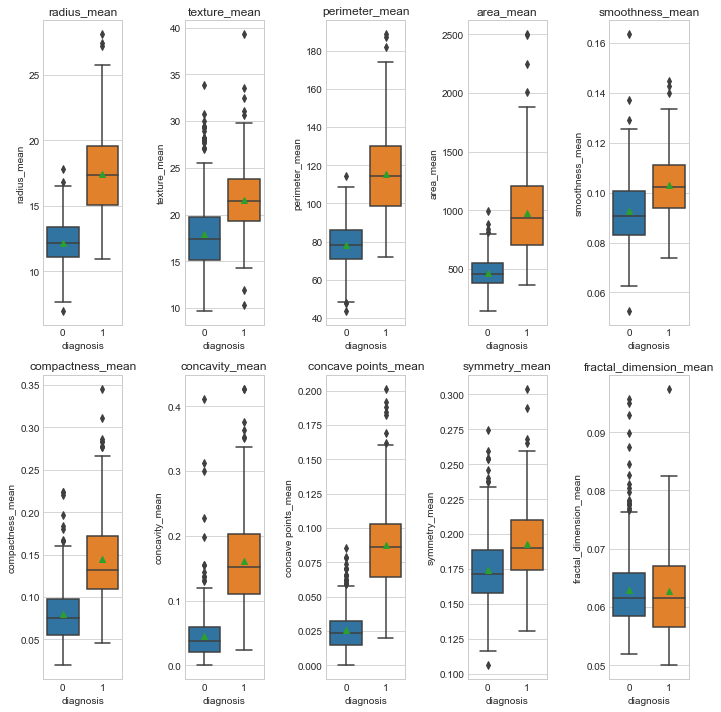

In [45]:
#То же самое на боксплоте
f, axarr = plt.subplots(2,5, figsize=(10, 10))

sns.boxplot(x=y, y='radius_mean', data=x, showmeans=True, ax=axarr[0,0])
sns.boxplot(x=y, y='texture_mean', data=x, showmeans=True, ax=axarr[0,1])
sns.boxplot(x=y, y='perimeter_mean', data=x, showmeans=True, ax=axarr[0,2])
sns.boxplot(x=y, y='area_mean', data=x, showmeans=True, ax=axarr[0,3])
sns.boxplot(x=y, y='smoothness_mean', data=x, showmeans=True, ax=axarr[0,4])
sns.boxplot(x=y, y='compactness_mean', data=x, showmeans=True, ax=axarr[1,0])
sns.boxplot(x=y, y='concavity_mean', data=x, showmeans=True, ax=axarr[1,1])
sns.boxplot(x=y, y='concave points_mean', data=x, showmeans=True, ax=axarr[1,2])
sns.boxplot(x=y, y='symmetry_mean', data=x, showmeans=True, ax=axarr[1,3])
sns.boxplot(x=y, y='fractal_dimension_mean', data=x, showmeans=True, ax=axarr[1,4])

axarr[0, 0].set_title('radius_mean')
axarr[0, 1].set_title('texture_mean')
axarr[0, 2].set_title('perimeter_mean')
axarr[0, 3].set_title('area_mean')
axarr[0, 4].set_title('smoothness_mean')
axarr[1, 0].set_title('compactness_mean')
axarr[1, 1].set_title('concavity_mean')
axarr[1, 2].set_title('concave points_mean')
axarr[1, 3].set_title('symmetry_mean')
axarr[1, 4].set_title('fractal_dimension_mean')



plt.tight_layout()
plt.show()

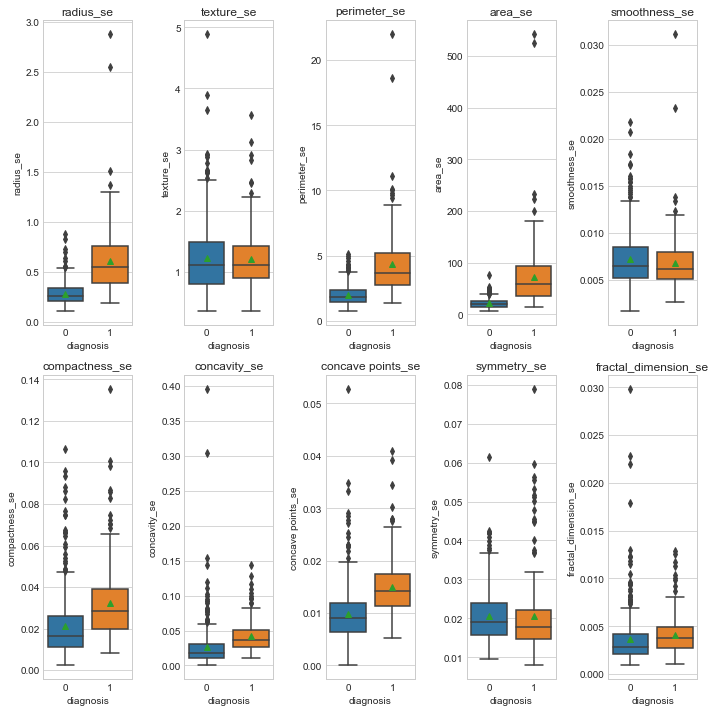

In [46]:
f, axarr = plt.subplots(2,5, figsize=(10, 10))

sns.boxplot(x=y, y='radius_se', data=x, showmeans=True, ax=axarr[0,0])
sns.boxplot(x=y, y='texture_se', data=x, showmeans=True, ax=axarr[0,1])
sns.boxplot(x=y, y='perimeter_se', data=x, showmeans=True, ax=axarr[0,2])
sns.boxplot(x=y, y='area_se', data=x, showmeans=True, ax=axarr[0,3])
sns.boxplot(x=y, y='smoothness_se', data=x, showmeans=True, ax=axarr[0,4])
sns.boxplot(x=y, y='compactness_se', data=x, showmeans=True, ax=axarr[1,0])
sns.boxplot(x=y, y='concavity_se', data=x, showmeans=True, ax=axarr[1,1])
sns.boxplot(x=y, y='concave points_se', data=x, showmeans=True, ax=axarr[1,2])
sns.boxplot(x=y, y='symmetry_se', data=x, showmeans=True, ax=axarr[1,3])
sns.boxplot(x=y, y='fractal_dimension_se', data=x, showmeans=True, ax=axarr[1,4])

axarr[0, 0].set_title('radius_se')
axarr[0, 1].set_title('texture_se')
axarr[0, 2].set_title('perimeter_se')
axarr[0, 3].set_title('area_se')
axarr[0, 4].set_title('smoothness_se')
axarr[1, 0].set_title('compactness_se')
axarr[1, 1].set_title('concavity_se')
axarr[1, 2].set_title('concave points_se')
axarr[1, 3].set_title('symmetry_se')
axarr[1, 4].set_title('fractal_dimension_se')


plt.tight_layout()
plt.show()



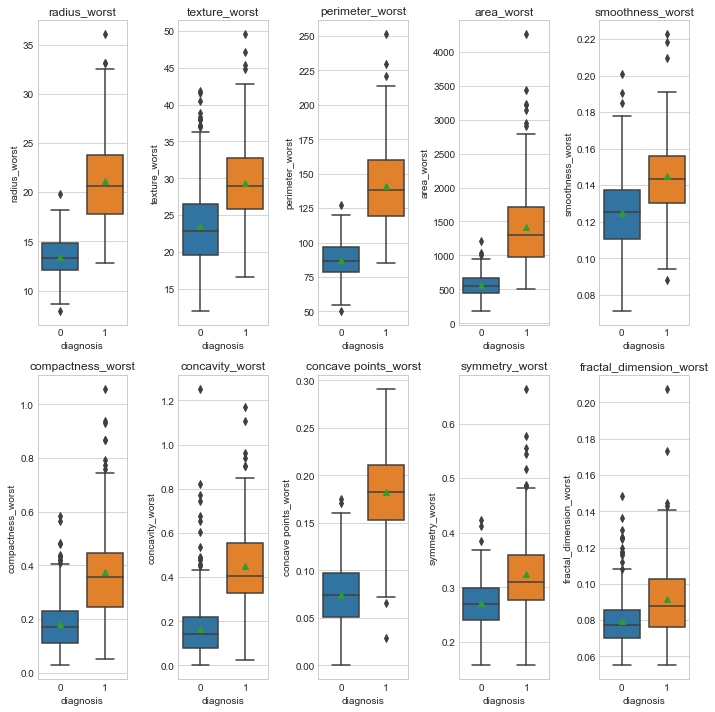

In [47]:
f, axarr = plt.subplots(2,5, figsize=(10, 10))

sns.boxplot(x=y, y='radius_worst', data=x, showmeans=True, ax=axarr[0,0])
sns.boxplot(x=y, y='texture_worst', data=x, showmeans=True, ax=axarr[0,1])
sns.boxplot(x=y, y='perimeter_worst', data=x, showmeans=True, ax=axarr[0,2])
sns.boxplot(x=y, y='area_worst', data=x, showmeans=True, ax=axarr[0,3])
sns.boxplot(x=y, y='smoothness_worst', data=x, showmeans=True, ax=axarr[0,4])
sns.boxplot(x=y, y='compactness_worst', data=x, showmeans=True, ax=axarr[1,0])
sns.boxplot(x=y, y='concavity_worst', data=x, showmeans=True, ax=axarr[1,1])
sns.boxplot(x=y, y='concave points_worst', data=x, showmeans=True, ax=axarr[1,2])
sns.boxplot(x=y, y='symmetry_worst', data=x, showmeans=True, ax=axarr[1,3])
sns.boxplot(x=y, y='fractal_dimension_worst', data=x, showmeans=True, ax=axarr[1,4])

axarr[0, 0].set_title('radius_worst')
axarr[0, 1].set_title('texture_worst')
axarr[0, 2].set_title('perimeter_worst')
axarr[0, 3].set_title('area_worst')
axarr[0, 4].set_title('smoothness_worst')
axarr[1, 0].set_title('compactness_worst')
axarr[1, 1].set_title('concavity_worst')
axarr[1, 2].set_title('concave points_worst')
axarr[1, 3].set_title('symmetry_worst')
axarr[1, 4].set_title('fractal_dimension_worst')


plt.tight_layout()
plt.show()

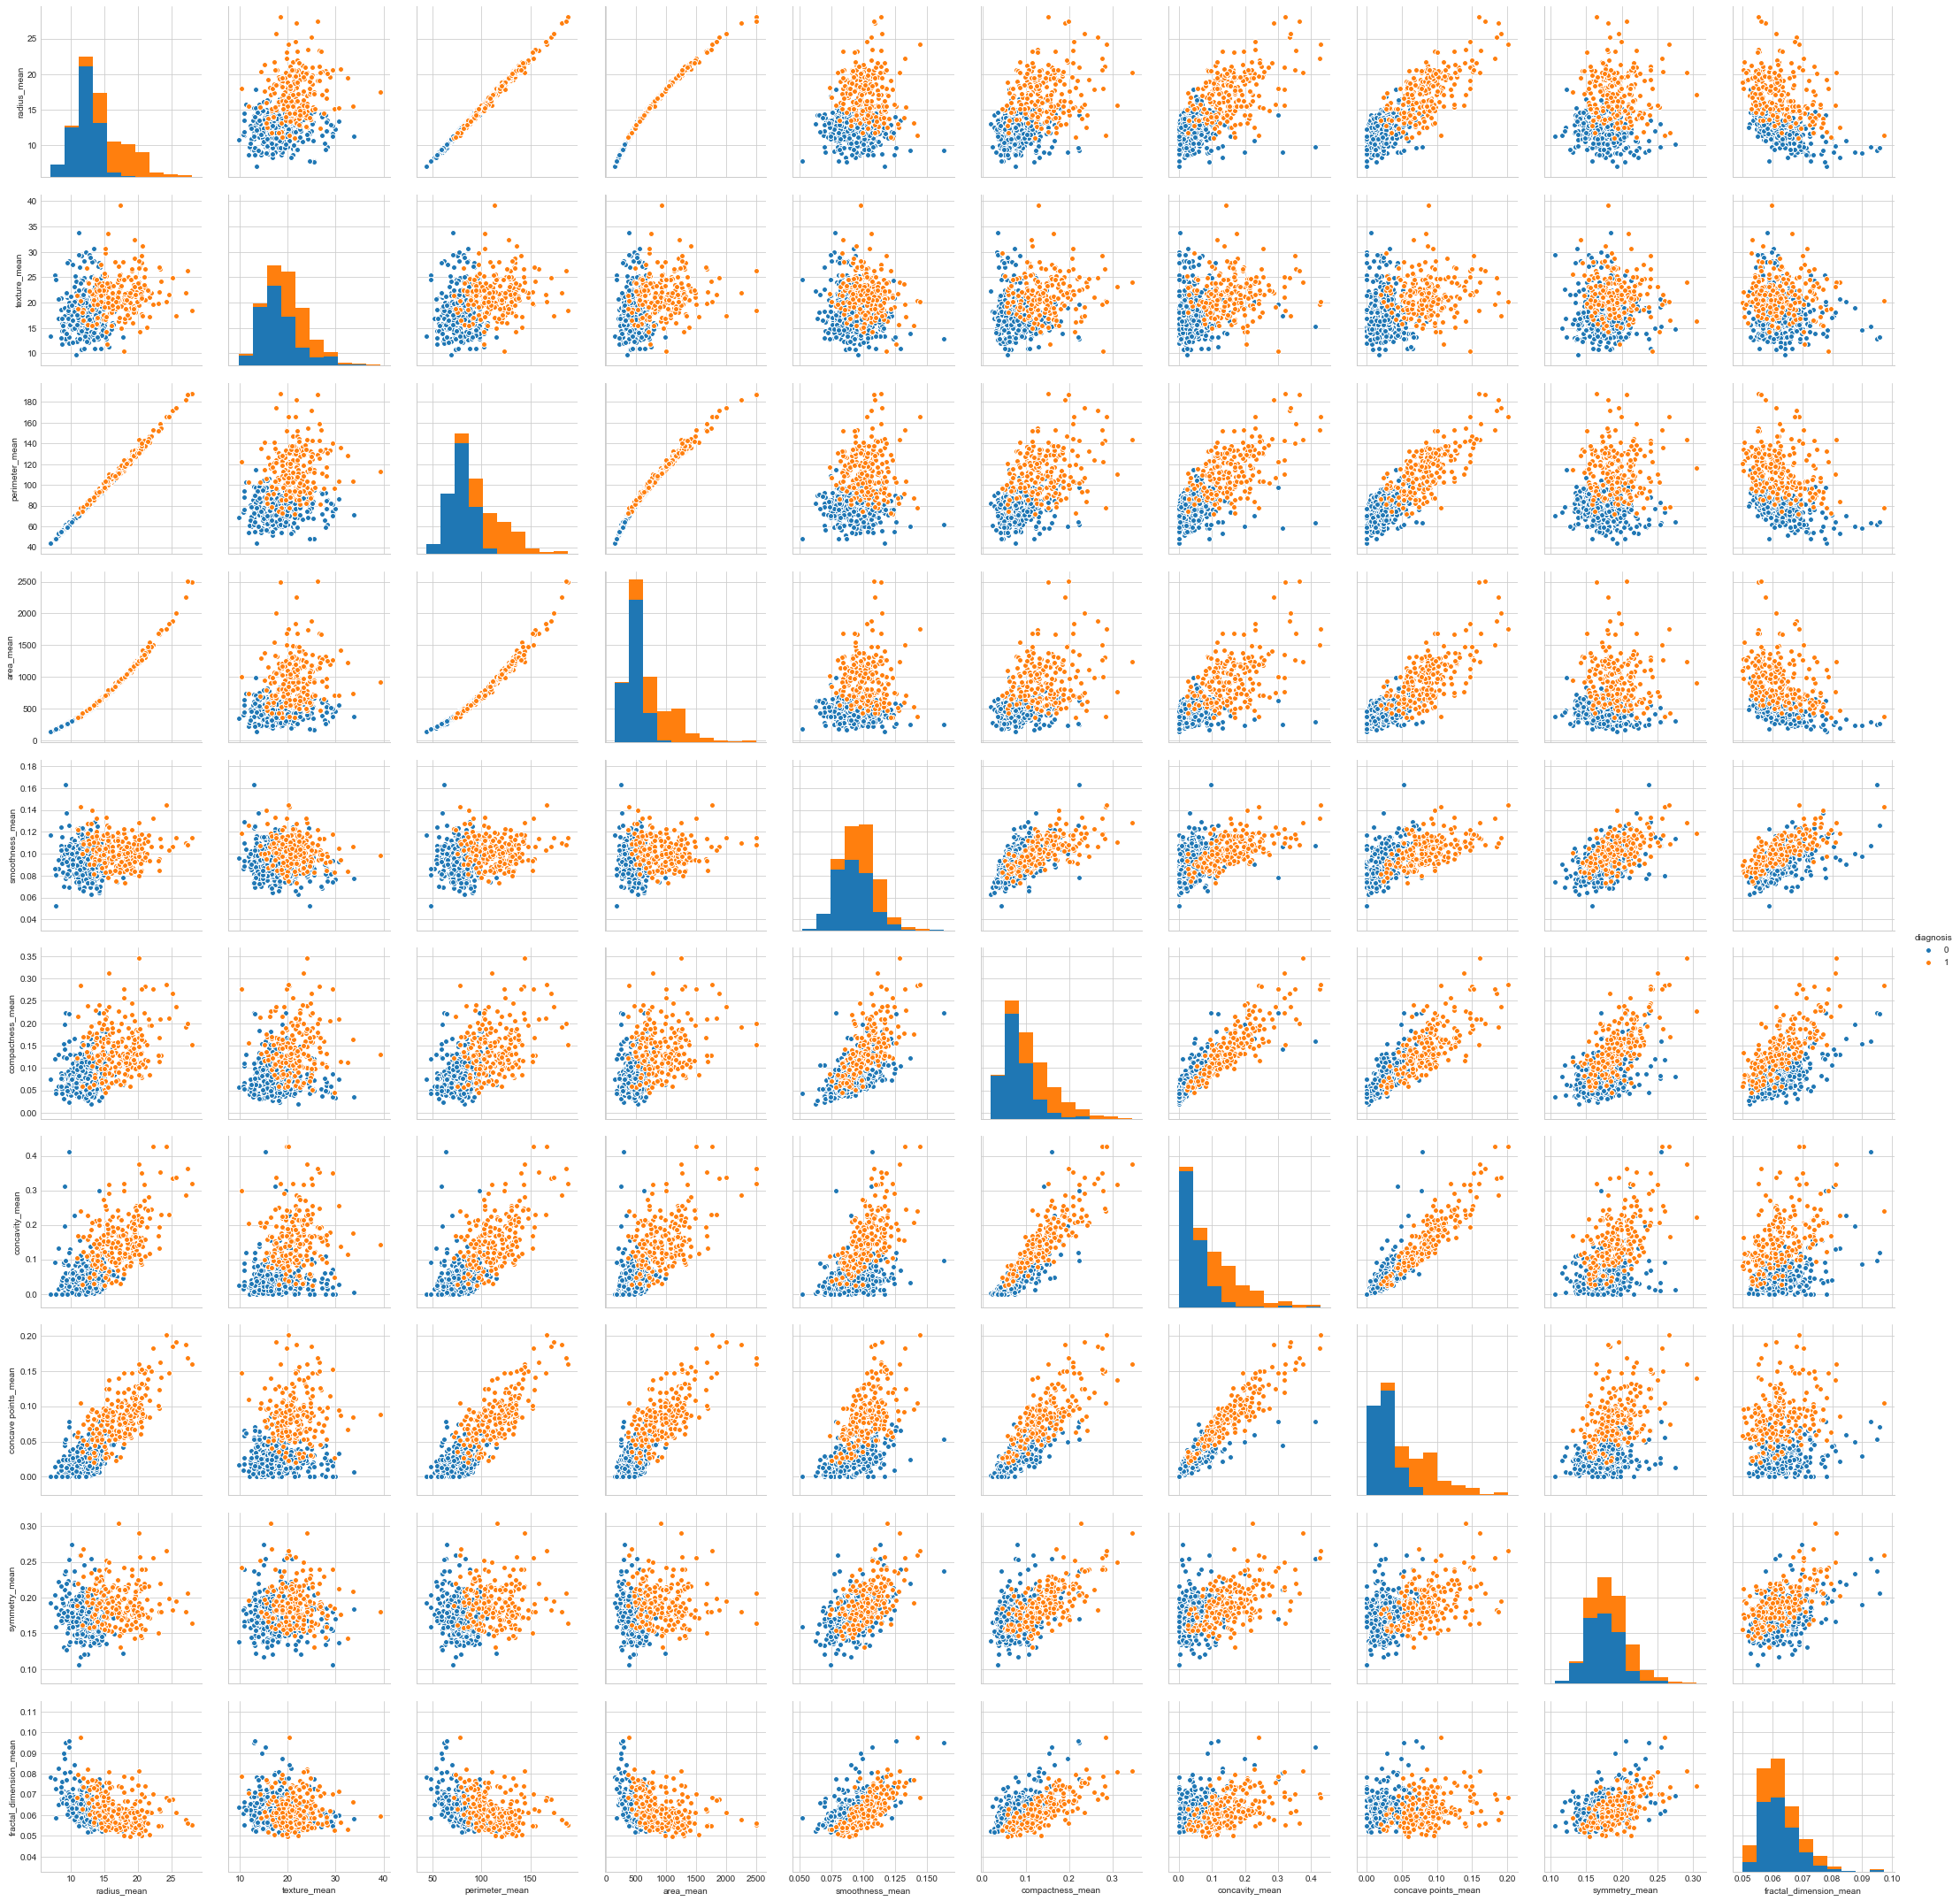

In [48]:
sns.pairplot(df, vars=x.columns[:10], hue='diagnosis', size=3)
plt.show()

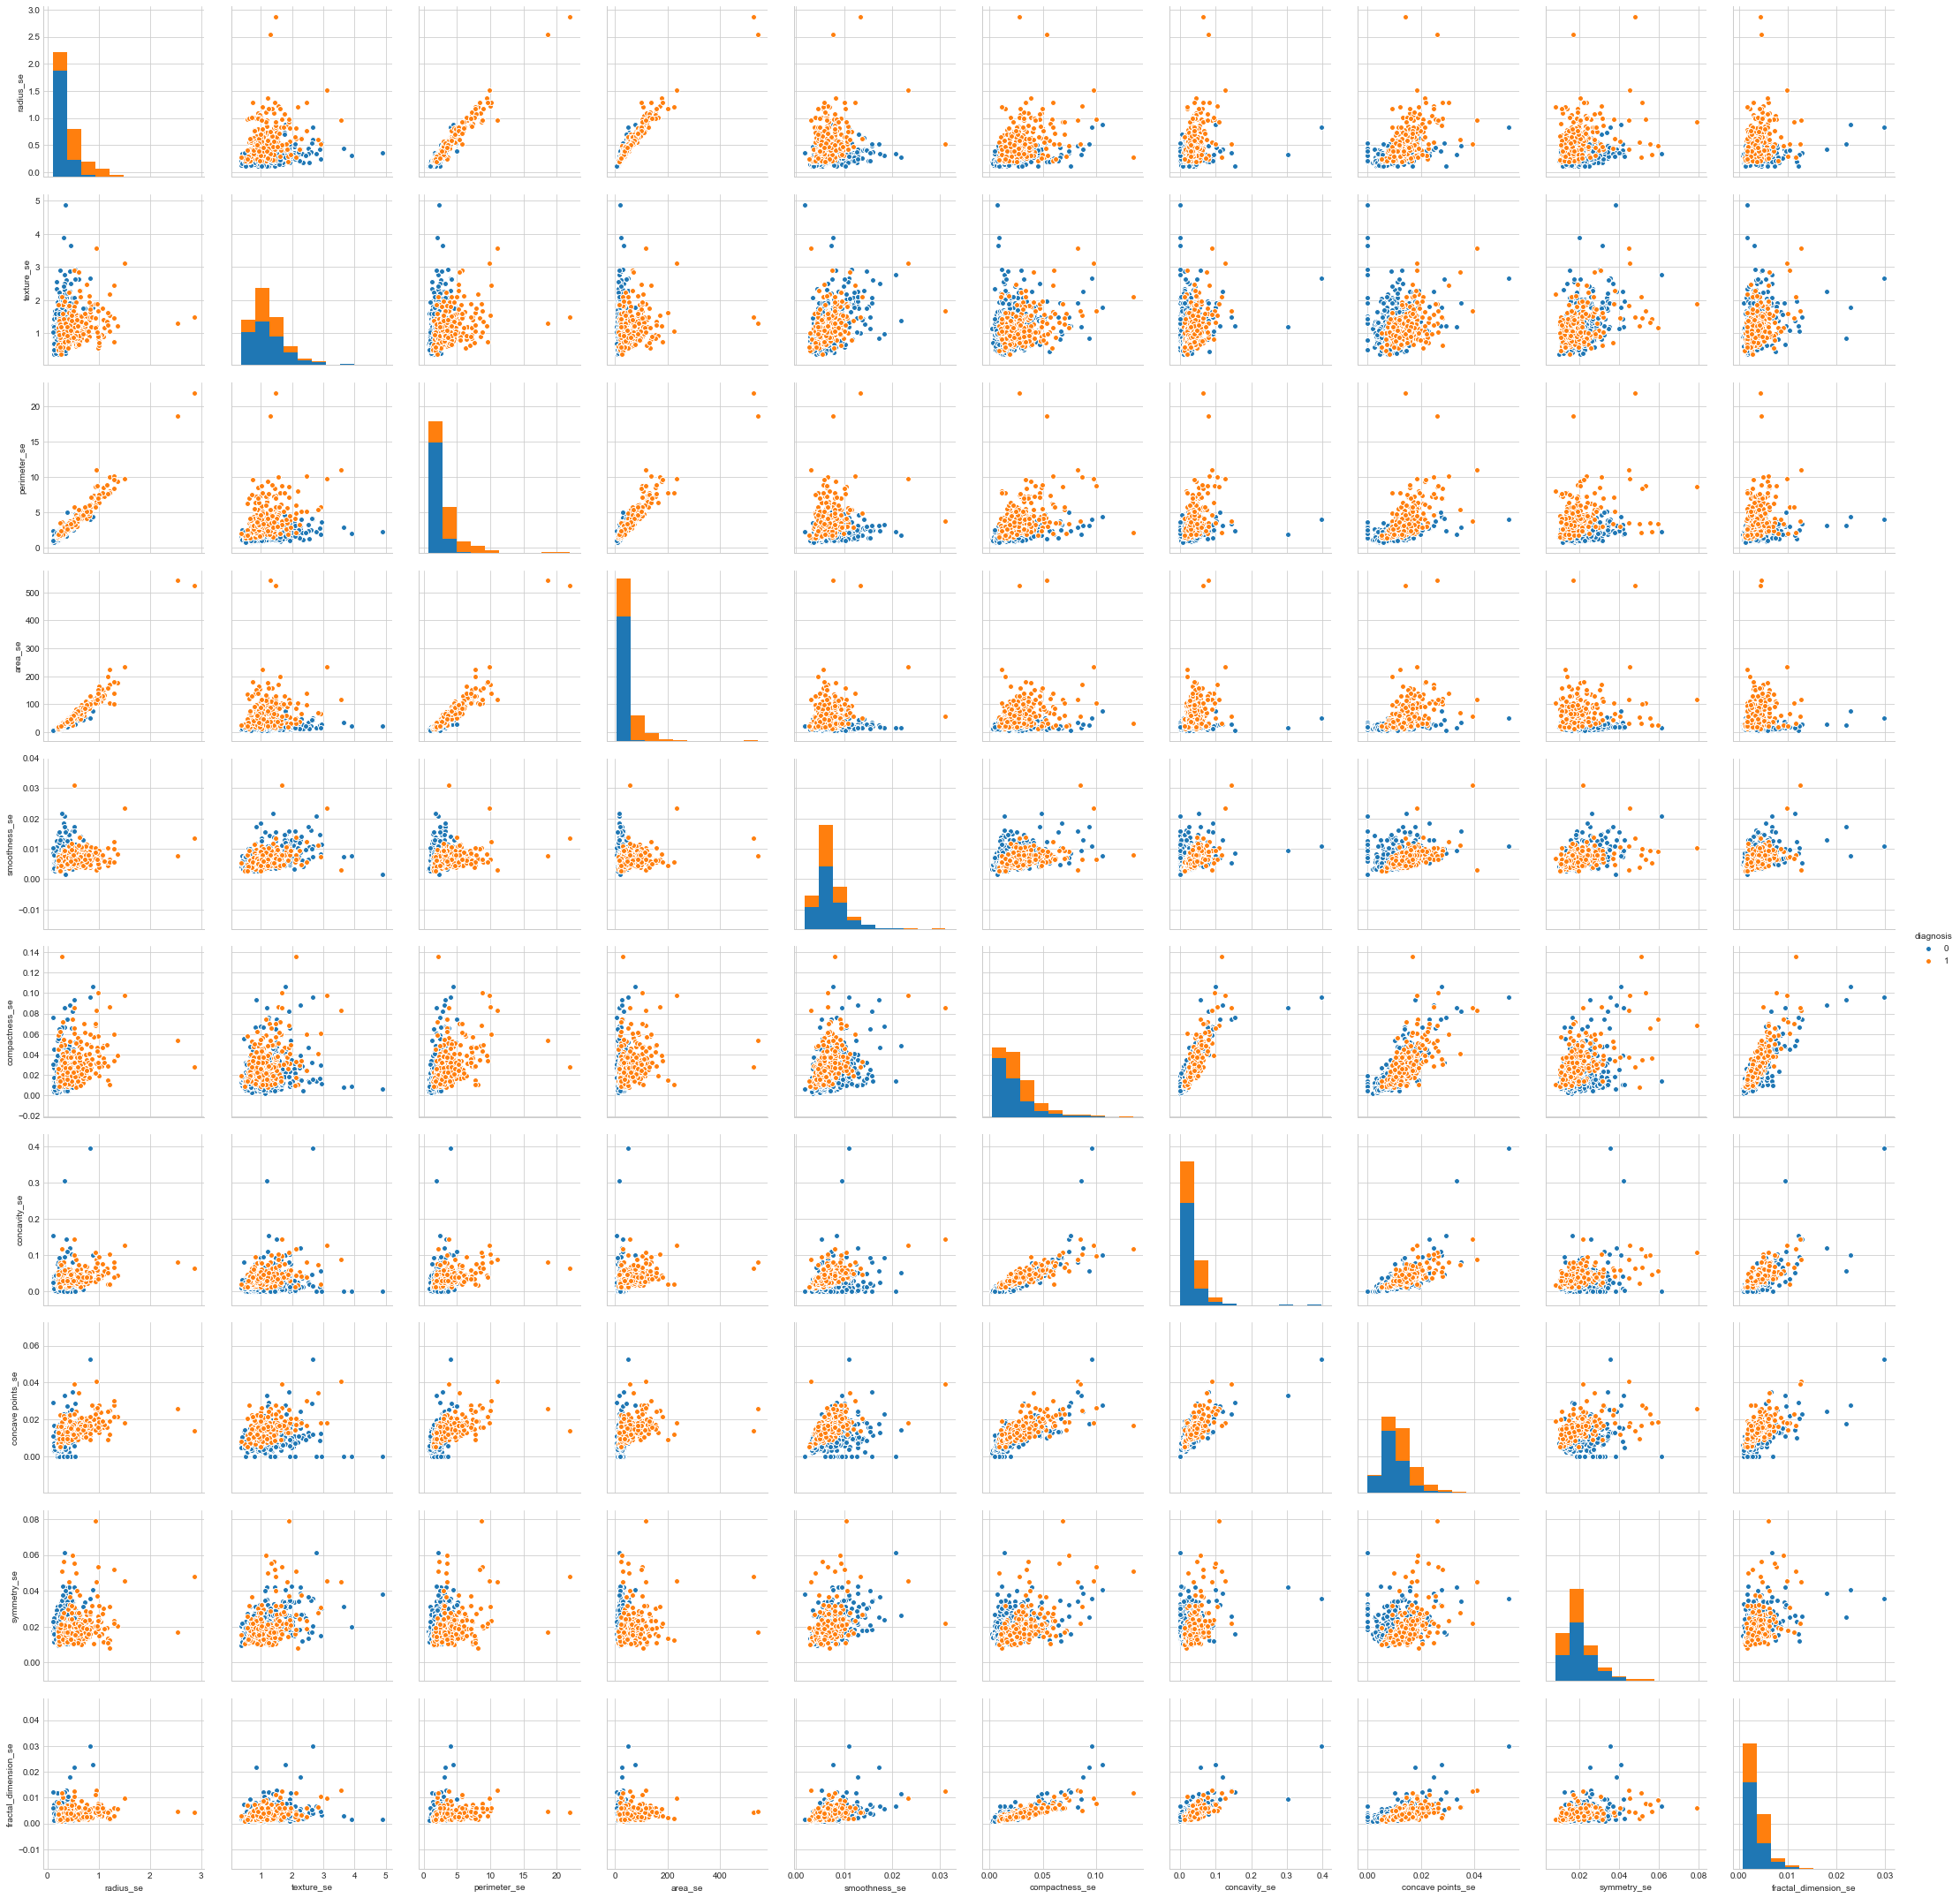

In [49]:
sns.pairplot(df, vars=x.columns[10:20], hue='diagnosis', size=3)
plt.show()

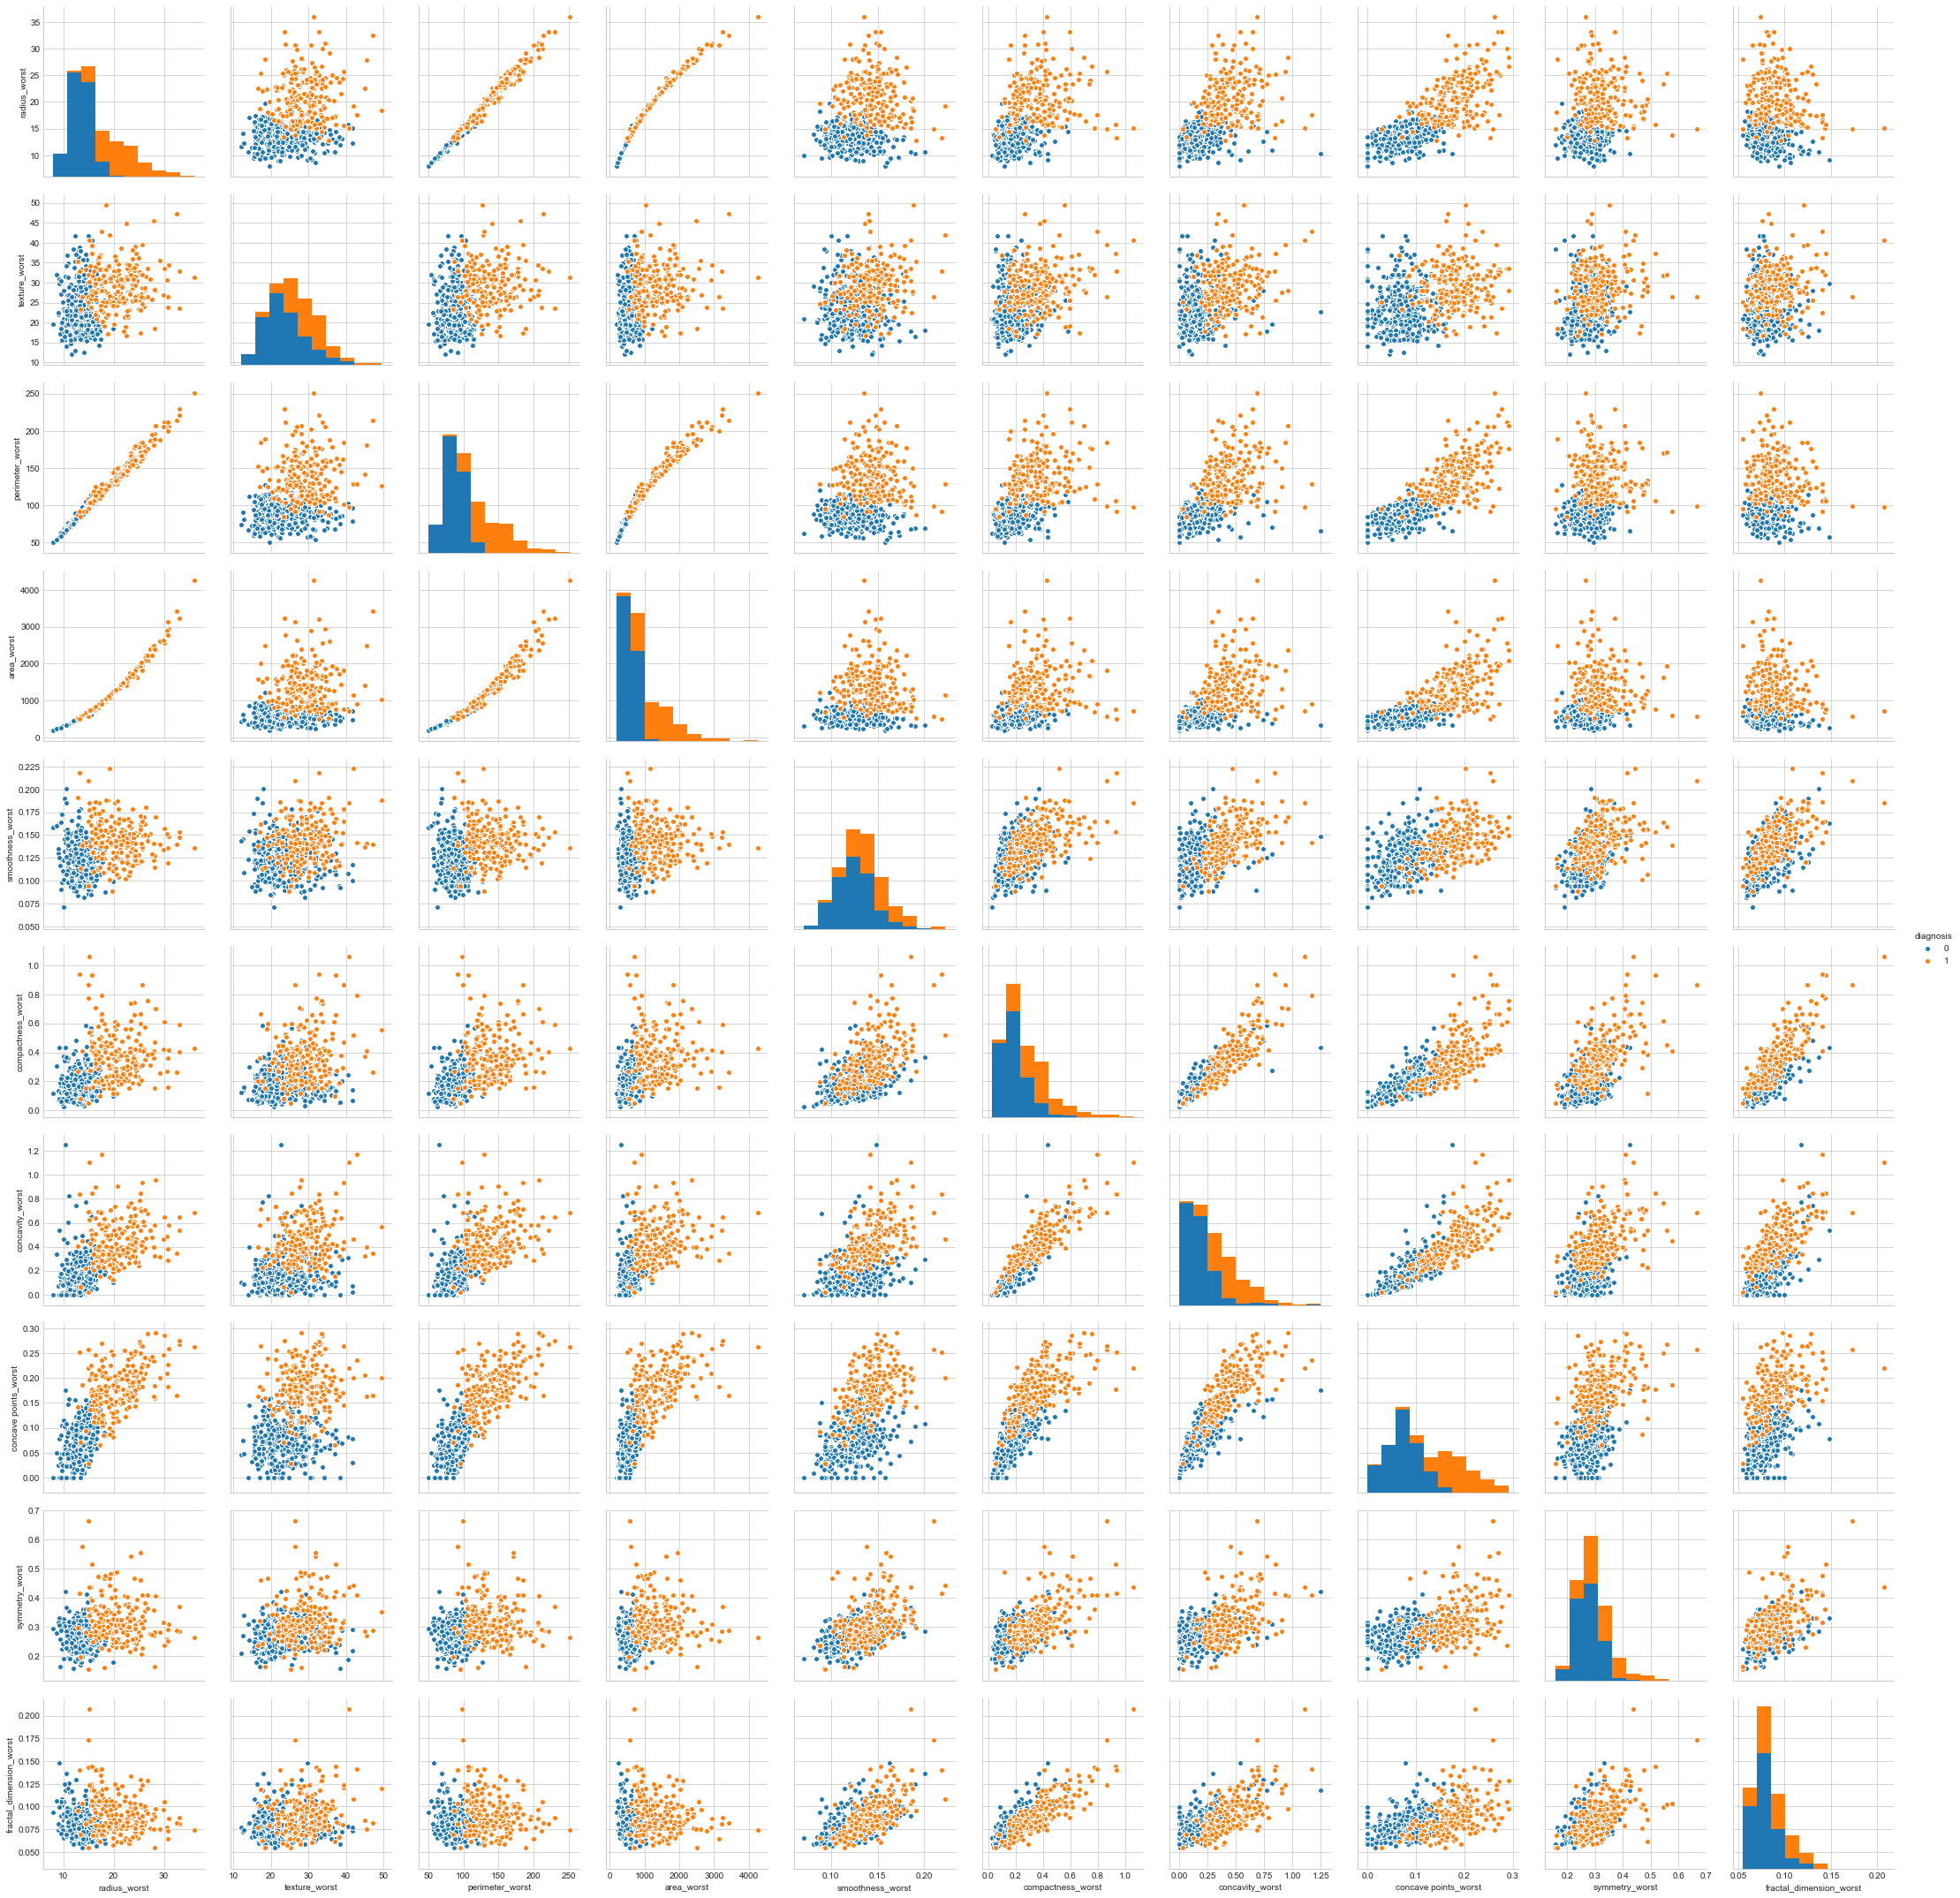

In [50]:
sns.pairplot(df, vars=x.columns[20:31], hue='diagnosis', size=3)
plt.show()

6. С помощью статистических методов проверить взаимосвязи между переменными.

In [92]:
#проведем для начала нормализацию
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_temp = scaler.fit_transform(x)
X_normalized = pd.DataFrame(x_temp, columns=x.columns)
X_normalized.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                2.255747   2.489734   -0.565265      2.833031  2.487578   
1               -0.868652   0.499255   -0.876244      0.263327  0.742402   
2               -0.398008   1.228676   -0.780083      0.850928  1.181336   
3                4.910919   0.326373   -0.110409      0.286593 -0.288378   
4               -0.562450   1.270543   -0.790244      1.273189  1.190357   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0      -0.214002        1.316862      0.724026           0.660820   
1      -0.605351       -0.692926     -0.440780           0.260162   
2      -0.297005        0.814974      0.213076           1.424827   
3       0.689702        2.744280      0.819518           1.115007   
4       1.483067       -0.048520      0.828471           1.144205   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083      1.886690      -1.359293   
1    -0.805450             -0.099444      1.805927      -0.369203   
2     0.237036              0.293559      1.511870      -0.023974   
3     4.732680              2.047511     -0.281464       0.133984   
4    -0.361092              0.499328      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100

In [96]:
# Провдем t-тест -в принципе все значимо отличаются
def t_test_(x,y):
    statistic, p_value = stats.ttest_rel(x,y)
    return p_value

#Переберем все комбинации параметров
import itertools
stuff =x.columns
for L in range(2,3):
    for subset in itertools.combinations(stuff, L):
        print(subset,t_test_(x[subset[0]],x[subset[1]]))
        

('radius_mean', 'texture_mean') 6.397223127785219e-103
('radius_mean', 'perimeter_mean') 0.0
('radius_mean', 'area_mean') 1.5253492492559045e-184
('radius_mean', 'smoothness_mean') 0.0
('radius_mean', 'compactness_mean') 0.0
('radius_mean', 'concavity_mean') 0.0
('radius_mean', 'concave points_mean') 0.0
('radius_mean', 'symmetry_mean') 0.0
('radius_mean', 'fractal_dimension_mean') 0.0
('radius_mean', 'radius_se') 0.0
('radius_mean', 'texture_se') 0.0
('radius_mean', 'perimeter_se') 0.0
('radius_mean', 'area_se') 5.307412351224868e-41
('radius_mean', 'smoothness_se') 0.0
('radius_mean', 'compactness_se') 0.0
('radius_mean', 'concavity_se') 0.0
('radius_mean', 'concave points_se') 0.0
('radius_mean', 'symmetry_se') 0.0
('radius_mean', 'fractal_dimension_se') 0.0
('radius_mean', 'radius_worst') 3.072323358187039e-123
('radius_mean', 'texture_worst') 7.835308271447979e-190
('radius_mean', 'perimeter_worst') 2.1051088627892818e-292
('radius_mean', 'area_worst') 3.888669967931867e-151
('rad

('symmetry_mean', 'concavity_worst') 1.8804873045020526e-25
('symmetry_mean', 'concave points_worst') 1.1973992440029711e-102
('symmetry_mean', 'symmetry_worst') 6.715042535312955e-231
('symmetry_mean', 'fractal_dimension_worst') 0.0
('fractal_dimension_mean', 'radius_se') 2.205787934636435e-116
('fractal_dimension_mean', 'texture_se') 3.3364373403247296e-210
('fractal_dimension_mean', 'perimeter_se') 1.526197055691005e-134
('fractal_dimension_mean', 'area_se') 1.682262690534119e-73
('fractal_dimension_mean', 'smoothness_se') 0.0
('fractal_dimension_mean', 'compactness_se') 8.340605417868177e-244
('fractal_dimension_mean', 'concavity_se') 1.2684603171605145e-101
('fractal_dimension_mean', 'concave points_se') 0.0
('fractal_dimension_mean', 'symmetry_se') 0.0
('fractal_dimension_mean', 'fractal_dimension_se') 0.0
('fractal_dimension_mean', 'radius_worst') 2.912382528304e-311
('fractal_dimension_mean', 'texture_worst') 0.0
('fractal_dimension_mean', 'perimeter_worst') 4.258880997974096e-

In [97]:
#Получается radius_se не значим
for col in x.columns:
    if t_test_(x[col],y)>0.05:
        print(col,t_test_(x[col],y))

radius_se 0.05162797866350118


In [99]:
def covariation(x,y):
    np.cov(x,y)
    return x.cov(y)
   

In [100]:
#Еще исследуем ковариации- там где высокие-будем выбрасывать
import itertools
stuff =x.columns
for L in range(2,3):
    for subset in itertools.combinations(stuff, L):
        if abs(covariation(x[subset[0]],x[subset[1]]))>4:
            
            print(subset,covariation(x[subset[0]],x[subset[1]]))

('radius_mean', 'texture_mean') 4.907581563992921
('radius_mean', 'perimeter_mean') 85.44714165573407
('radius_mean', 'area_mean') 1224.4834093464567
('radius_mean', 'perimeter_se') 4.803549731106278
('radius_mean', 'area_se') 117.96816160540791
('radius_mean', 'radius_worst') 16.51374945333115
('radius_mean', 'texture_worst') 6.433100019276468
('radius_mean', 'perimeter_worst') 114.28857022658357
('radius_mean', 'area_worst') 1888.2272234167306
('texture_mean', 'perimeter_mean') 34.43975916668729
('texture_mean', 'area_mean') 485.9937866562291
('texture_mean', 'area_se') 50.840865203903554
('texture_mean', 'radius_worst') 7.329267003453056
('texture_mean', 'texture_worst') 24.110148494084008
('texture_mean', 'perimeter_worst') 51.74593317346964
('texture_mean', 'area_worst') 841.2838320874279
('perimeter_mean', 'area_mean') 8435.772345082798
('perimeter_mean', 'radius_se') 4.661401016955865
('perimeter_mean', 'perimeter_se') 34.053027780941356
('perimeter_mean', 'area_se') 823.4927552

In [66]:
# Также можно посомтерть на значимость коэффциеонтов в логистическиой модели, она штрафует переменные с низким влянием
import statsmodels.api as sm
logit_model=sm.Logit(y,X_normalized)
result=logit_model.fit()
print(result.summary2())
print()


Optimization terminated successfully.
         Current function value: 0.033148
         Iterations 18
                                Results: Logit
Model:                  Logit                Pseudo R-squared:     0.950      
Dependent Variable:     diagnosis            AIC:                  97.7220    
Date:                   2018-11-20 10:57     BIC:                  228.0384   
No. Observations:       569                  Log-Likelihood:       -18.861    
Df Model:               29                   LL-Null:              -375.72    
Df Residuals:           539                  LLR p-value:          1.3491e-131
Converged:              1.0000               Scale:                1.0000     
No. Iterations:         18.0000                                               
------------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025     0.975] 
------------------------------------------------------------

7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих
двух подходов даст лучший результат при классификации? 

Сформируем усеченный датасет и и датасет с главными компонентами

Text(0,0.5,'explained_variance_ratio_')

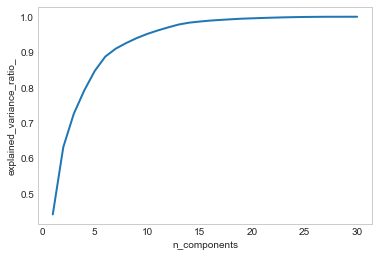

In [105]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA().fit(X_normalized)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [107]:
# Видно что после 10 объясненная вариация растет оч медленно. ОК, возьмем 10
from sklearn.decomposition import PCA, KernelPCA

components = 10
pca = PCA(n_components=components).fit(X_normalized)
X_PCA=pd.DataFrame(PCA(n_components=components).fit_transform(X_normalized))
sum(pca.explained_variance_ratio_)

0.9515688143348917

In [109]:
X_PCA.head()

0          1         2         3         4         5         6  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429910   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

          7         8         9  
0 -0.398407 -0.157121 -0.877393  
1  0.240987 -0.711907  1.106987  
2  0.097372  0.024061  0.454273  
3  1.059561 -1.405446 -1.116988  
4  0.636377 -0.263802  0.377701

In [110]:
#Удалим незанчимую перменную radius_se. и перменные которые коррелируют между собой
to_drop = ['perimeter_mean','radius_mean','compactness_mean'
              ,'concave points_mean','radius_se','perimeter_se','radius_worst',
              'perimeter_worst','compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']

In [111]:
X_normalized_Dropped = x.drop(to_drop,axis = 1 )        # do not modify x, we will use it later 
X_normalized_Dropped.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

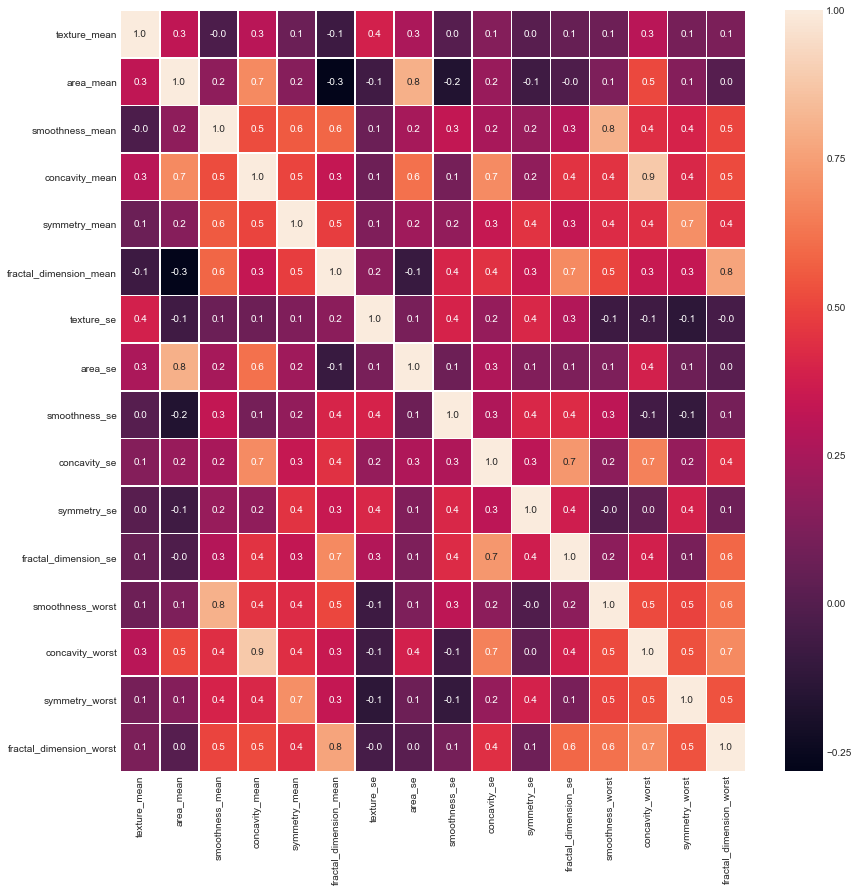

In [112]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X_normalized_Dropped.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9532163742690059


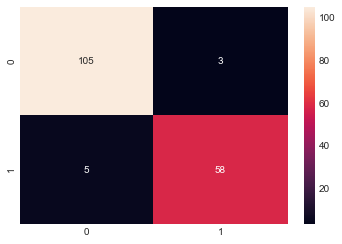

In [158]:
# Прогним усеченную модель в RandomForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
summary= {}
# сформируем трейин-тест
x_train, x_test, y_train, y_test = train_test_split(X_normalized_Dropped, y, test_size=0.3, random_state=42)

#
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

summary.update({'RFC':ac})

Итого у нас 8 ошибок первого и второго рода

Accuracy is:  0.935672514619883


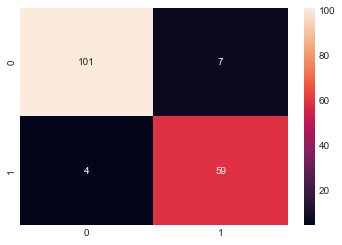

In [159]:
# Проделаем тоже упраженение с PCA -перменными

# сформируем трейин-тест
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

#
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

summary.update({'RFC_pca':ac})

Ошибок стало меньше на одну. Но выборка маленькая нельхзя точно сказать как лучше

In [150]:
X = X_normalized_Dropped
y = y
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  498
Number of no subscription in oversampled data 249
Number of subscription 249
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Accuracy is:  0.9466666666666667


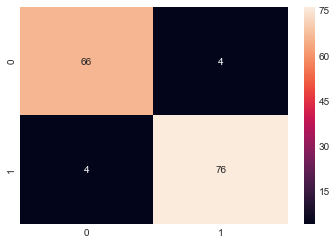

In [160]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# сформируем трейин-тест
x_train, x_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=42)

#
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
summary.update({'RFC_OS':ac})

Точность после Oversampling-а даже немного упала

In [152]:
components = 10
pca = PCA(n_components=components).fit(os_data_X)
os_X_PCA=pd.DataFrame(PCA(n_components=components).fit_transform(os_data_X))
sum(pca.explained_variance_ratio_)

0.9999999990046344

Accuracy is:  0.9666666666666667


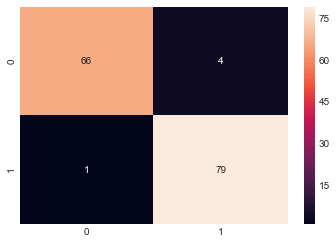

In [161]:
# Проделаем тоже упраженение с PCA -перменными

# сформируем трейин-тест
x_train, x_test, y_train, y_test = train_test_split(os_X_PCA, os_data_y, test_size=0.3, random_state=42)

#
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
summary.update({'RFC_pca_OS':ac})

In [162]:
# похоже RFC_pca_OS самала лучшая, но несущественно. Ну Ок, дальше будем использовать такой подход
summary

{'RFC': 0.9532163742690059,
 'RFC_pca': 0.935672514619883,
 'RFC_OS': 0.9466666666666667,
 'RFC_pca_OS': 0.9666666666666667}

9. Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=10).

In [185]:
from sklearn.model_selection import KFold, cross_val_score

num_instances=len(os_X_PCA)
kfold = KFold(n_splits=10,shuffle=True, random_state=1)
kfold

KFold(n_splits=10, random_state=1, shuffle=True)

Accuracy is:  0.9666666666666667


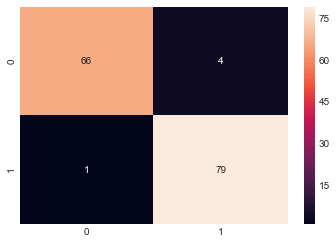

In [180]:

# сформируем трейин-тест
x_train, x_test, y_train, y_test = train_test_split(os_X_PCA, os_data_y, test_size=0.3, random_state=42)

#
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
summary.update({'RFC_pca_OS':ac})

In [194]:

from sklearn.model_selection import KFold, cross_val_score

In [201]:
#В среднем достатчтно высокая средняя обясяющая сопосбность
cross_val_score(clf_rf,os_X_PCA, os_data_y, cv=kfold).mean()

0.9435918367346938

In [202]:
#Имеем достаточно устойчивый результат
cross_val_score(clf_rf,os_X_PCA, os_data_y, cv=kfold).std()

0.033821345063793626

Я решил, что логичнее сделать это ранее

In [209]:
from sklearn.linear_model import LogisticRegression

Logistic_Regression = LogisticRegression(random_state=43).fit(os_X_PCA, os_data_y)
Logistic_Regression.predict_proba(x_test)

array([[5.74467623e-02, 9.42553238e-01],
       [9.90602723e-01, 9.39727695e-03],
       [4.91235061e-01, 5.08764939e-01],
       [9.48826986e-01, 5.11730141e-02],
       [8.81861393e-01, 1.18138607e-01],
       [3.36011928e-05, 9.99966399e-01],
       [8.67580738e-01, 1.32419262e-01],
       [9.29123038e-01, 7.08769621e-02],
       [5.10590353e-07, 9.99999489e-01],
       [1.63340896e-05, 9.99983666e-01],
       [4.09503841e-06, 9.99995905e-01],
       [1.20806773e-04, 9.99879193e-01],
       [2.37617552e-02, 9.76238245e-01],
       [9.64817270e-01, 3.51827298e-02],
       [9.91624114e-01, 8.37588580e-03],
       [8.12297947e-06, 9.99991877e-01],
       [7.10391152e-03, 9.92896088e-01],
       [9.94766461e-01, 5.23353919e-03],
       [9.67208919e-01, 3.27910805e-02],
       [2.92060044e-03, 9.97079400e-01],
       [6.56569615e-01, 3.43430385e-01],
       [8.99341430e-01, 1.00658570e-01],
       [2.99063599e-01, 7.00936401e-01],
       [7.05799082e-06, 9.99992942e-01],
       [9.060311

In [247]:
from sklearn.svm import SVC

SVC_ = SVC(random_state=43, probability=True).fit(os_X_PCA, os_data_y)
SVC_.predict_proba(x_test)[:10]

array([[0.01822989, 0.98177011],
       [0.98303226, 0.01696774],
       [0.98301809, 0.01698191],
       [0.87989606, 0.12010394],
       [0.98307029, 0.01692971],
       [0.01823674, 0.98176326],
       [0.98303065, 0.01696935],
       [0.98303932, 0.01696068],
       [0.01824827, 0.98175173],
       [0.01821537, 0.98178463]])

In [248]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
RFC_ = RandomForestClassifier(random_state=43).fit(os_X_PCA, os_data_y)
RFC_.predict_proba(x_test)[:10]

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

In [249]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
GBC_ = GradientBoostingClassifier(random_state=43).fit(os_X_PCA, os_data_y)
y_gbc=GBC_.predict_proba(x_test)
y_gbc[:10]

array([[3.63118483e-03, 9.96368815e-01],
       [9.92670501e-01, 7.32949945e-03],
       [9.98209951e-01, 1.79004938e-03],
       [9.96199900e-01, 3.80009980e-03],
       [9.98116892e-01, 1.88310766e-03],
       [1.25778827e-03, 9.98742212e-01],
       [9.88901194e-01, 1.10988060e-02],
       [9.90528158e-01, 9.47184206e-03],
       [2.23966084e-03, 9.97760339e-01],
       [6.64726859e-04, 9.99335273e-01]])

12. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [214]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
seed = 7
processors=1
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# Evaluate each model in turn
results = []
names = []
scor=['accuracy','f1','precision', 'recall']
for x in scor:
    print(x,":")
    for name, model in models:
        cv_results = cross_val_score(model,os_X_PCA, os_data_y, cv=kfold)
        results.append(cv_results)
        names.append(name)
        print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

accuracy :
LR: (0.940) +/- (0.027)
SVC: (0.663) +/- (0.082)
RFC: (0.934) +/- (0.030)
GB: (0.960) +/- (0.027)
f1 :
LR: (0.940) +/- (0.027)
SVC: (0.663) +/- (0.082)
RFC: (0.954) +/- (0.026)
GB: (0.962) +/- (0.025)
precision :
LR: (0.940) +/- (0.027)
SVC: (0.663) +/- (0.082)
RFC: (0.946) +/- (0.033)
GB: (0.962) +/- (0.025)
recall :
LR: (0.940) +/- (0.027)
SVC: (0.663) +/- (0.082)
RFC: (0.936) +/- (0.048)
GB: (0.962) +/- (0.025)


Получается градиентный бустинг точнее и устойчивее

In [215]:
from sklearn.metrics import brier_score_loss

In [ ]:
#сформируем оценки, фитили модель мы выше
y_gbc=GBC_.predict_proba(X_PCA)
y_gbc

In [246]:
# Получается не атк уж хорошо
brier_score_loss(y, y_gbc[:,0]) 

0.3003328384346407